# Machine Learning Terapan Proyek 1
## Ahmad Zein Al Wafi
Data yang digunakan dalam proyek ini adalah data [ILPD (Indian Liver Patient Dataset)
](https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)) dari UCI Machine Learning Repository. Kumpulan data ini berisi 416 catatan pasien hati dan 167 catatan pasien non hati. Kumpulan data dikumpulkan dari timur laut Andhra Pradesh, India. Selector adalah label kelas yang digunakan untuk membagi ke dalam kelompok (pasien gangguan hati atau tidak). Kumpulan data ini berisi 441 catatan pasien pria dan 142 catatan pasien wanita. Data memiliki sepuluh fitur yang dapat dipelajari. Data sudah dilabeli oleh pakar sehingga dapat diverifikasi dan digunakan.

### Persiapan lingkungan pengembangan

Dapatkan data yang akan digunakan

In [1]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv"

--2022-11-24 12:10:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23755 (23K) [application/x-httpd-php]
Saving to: ‘Indian Liver Patient Dataset (ILPD).csv’

Indian Liver Patien 100%[===================>]  23.20K  --.-KB/s    in 0.03s   

2022-11-24 12:10:02 (864 KB/s) - ‘Indian Liver Patient Dataset (ILPD).csv’ saved [23755/23755]



Mengimpor peralatan pendukung yang dibutuhkan

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
%matplotlib inline
import seaborn as sns
import copy
import statistics

from tensorflow.keras import regularizers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import svm
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from scipy.stats import *

print("Tensorflow Version", tf.__version__)

Tensorflow Version 2.9.2


Membaca data

In [3]:
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
df.sample()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
271,21,Male,18.5,9.5,380,390,500,8.2,4.1,1.0,1


Memberikan indeks kolom pada data

In [4]:
df.columns = ['Age', 'Gender', 'TB', 'DB', 'ALP', 'SGPT', 'SGOT', 'TP', 'ALB', 'AG', 'Status']
df.sample(5)

,Age,Gender,TB,DB,ALP,SGPT,SGOT,TP,ALB,AG,Status
567,20,Female,16.7,8.4,200,91,101,6.9,3.5,1.02,1
226,68,Female,0.7,0.2,186,18,15,6.4,3.8,1.40,1
70,75,Female,0.8,0.2,188,20,29,4.4,1.8,0.60,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
138,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50,1


### Persiapan dan Pemprosesan Data

Mendapatkan informasi dasar data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     582 non-null    int64  
 1   Gender  582 non-null    object 
 2   TB      582 non-null    float64
 3   DB      582 non-null    float64
 4   ALP     582 non-null    int64  
 5   SGPT    582 non-null    int64  
 6   SGOT    582 non-null    int64  
 7   TP      582 non-null    float64
 8   ALB     582 non-null    float64
 9   AG      578 non-null    float64
 10  Status  582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


Mengecek dan menghilangkan jika ada null pada data

In [6]:
print(df.isnull().sum())
for i in df.columns:
  df[i].isnull().sum()
  df.dropna(axis=0, inplace=True)

Age       0
Gender    0
TB        0
DB        0
ALP       0
SGPT      0
SGOT      0
TP        0
ALB       0
AG        4
Status    0
dtype: int64


Mengubah tipe data agar mempermudah proses pengembangan dan menyamakan label

In [7]:
setLabelGender = [{'Male':0}, {'Female':1}]
for i in setLabelGender:
  df['Gender'] = df['Gender'].replace(i)

setLabelStatus = [{1:0}, {2:1}]
for i in setLabelStatus:
  df['Status'] = df['Status'].replace(i)

### Exploratory Data Analysis

Mendapatkan informasi statistika deskriptif data

In [8]:
df.describe()

,Age,Gender,TB,DB,ALP,SGPT,SGOT,TP,ALB,AG,Status
count,578.000000,578.000000,578.000000,578.00000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,44.747405,0.240484,3.319896,1.49654,291.546713,81.238754,110.574394,6.481142,3.138235,0.947145,0.285467
std,16.213968,0.427748,6.232158,2.81834,243.734041,183.321431,290.075539,1.085500,0.795094,0.319863,0.452028
min,4.000000,0.000000,0.400000,0.10000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.20000,175.250000,23.250000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.30000,208.500000,35.000000,42.000000,6.600000,3.100000,0.940000,0.000000
75%,58.000000,0.000000,2.600000,1.30000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.70000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


Mengetahui distribusi Gender

0    439
1    139
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Distribusi Gender')

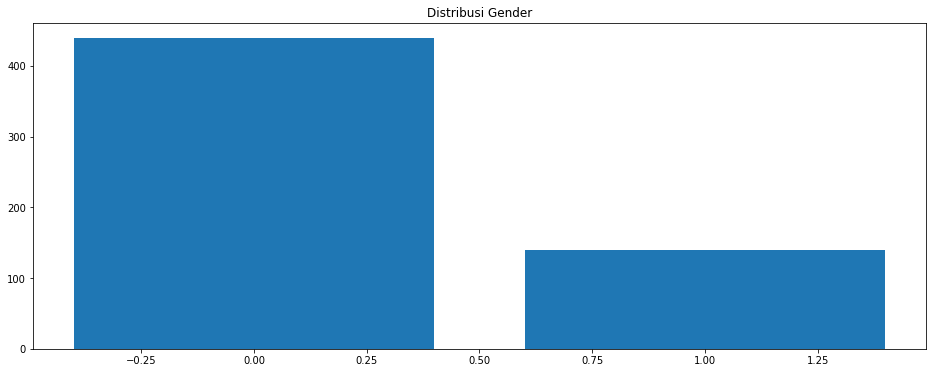

In [9]:
val_count = df['Gender'].value_counts()
print(val_count)
plt.figure(figsize=(16,6))
plt.bar(val_count.index, val_count.values)
plt.title("Distribusi Gender")

Mengetahui distribusi status

0    413
1    165
Name: Status, dtype: int64


Text(0.5, 1.0, 'Distribusi Status')

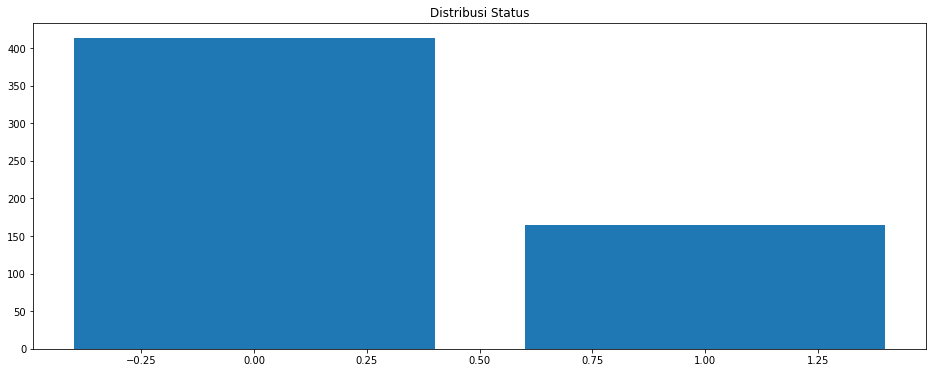

In [10]:
val_count = df['Status'].value_counts()
print(val_count)
plt.figure(figsize=(16,6))
plt.bar(val_count.index, val_count.values)
plt.title("Distribusi Status")

Mengetahui matriks kebingungan dari fitur gender dan fitur status, juga dapat mengetahui berbandingan distribusi data 

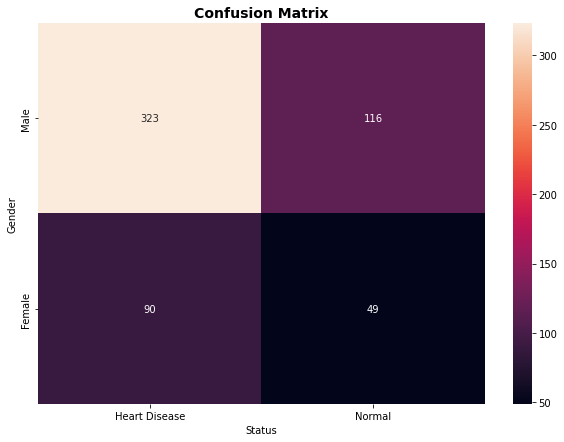

In [11]:
confusion_matrix = pd.crosstab(df['Gender'], df['Status'], rownames=['Gender'], colnames=['Status'])
plt.figure(figsize = (10,7))
ax = plt.axes()
ax.set_title('Confusion Matrix',fontsize=14, fontweight='bold')
sns.heatmap(confusion_matrix, annot=True, xticklabels=['Heart Disease', 'Normal'], yticklabels=['Male', 'Female'], fmt='g', ax=ax)


Melihat sebaran dan pengaruh antar fitur

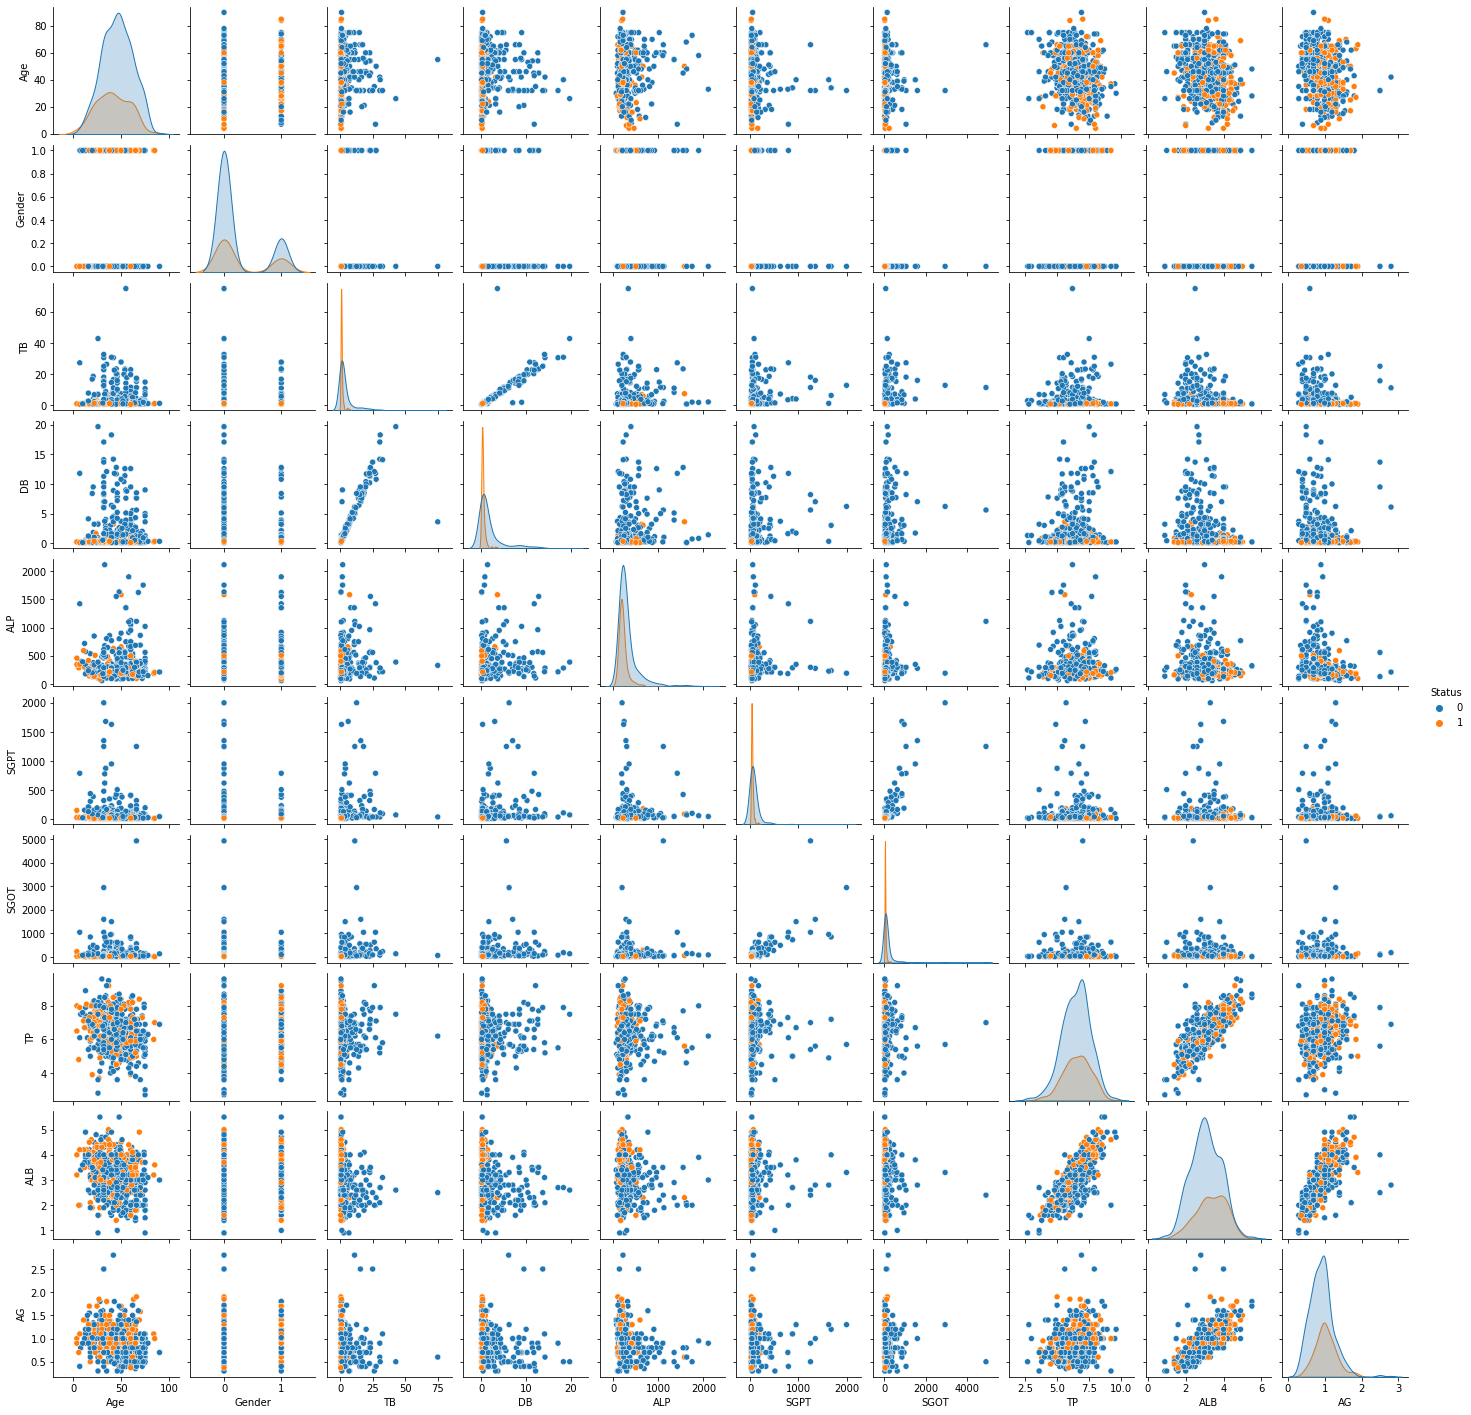

In [12]:
sns.pairplot(df, hue='Status', height=2)

Melihat visualisasi matriks korelasi setiap fitur

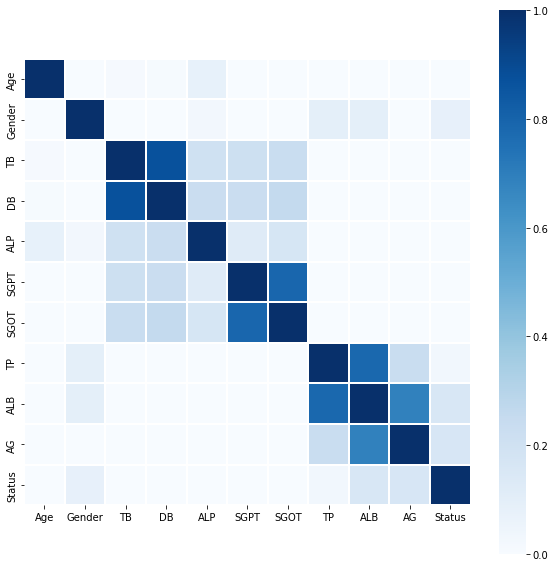

In [13]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax1 = sns.heatmap(corr, cbar=1, linewidths=1,vmax=1, vmin=0, square=True, cmap='Blues', ax=ax)
plt.show()

Mengetahui distribusi umur data, yang terlihat seperti distribusi normal

skewness: -0.03049575743651396
kurtosis: -0.5659777151222065


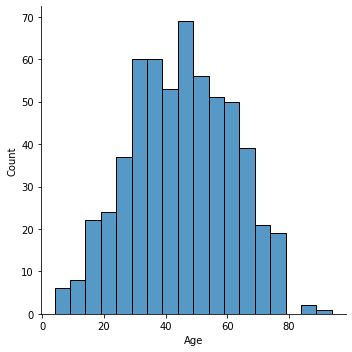

In [14]:
sns.displot(df, x="Age", binwidth=5)
print("skewness:", skew(df['Age'], axis=0, bias=True))
print("kurtosis:", kurtosis(df['Age'], axis=0, bias=True))

Mengetahui nilai P atau keputusan menerima asumsi jika fitur status memiliki korelasi dengan fitur lainnya

In [15]:
from scipy.stats import f_oneway
features = ['Age', 'Gender', 'TB', 'DB', 'ALP', 'SGPT', 'SGOT', 'TP', 'ALB', 'AG']

for i in features:
  CategoryGroupLists=df.groupby('Status')[i].apply(list)
  AnovaResults = f_oneway(*CategoryGroupLists)
  print('P-Value for feature',i,'is: ', AnovaResults[1])

P-Value for feature Age is:  0.001466933603274463
P-Value for feature Gender is:  0.04468782417594222
P-Value for feature TB is:  8.189356973346701e-08
P-Value for feature DB is:  1.768957480093091e-09
P-Value for feature ALP is:  8.575436389586912e-06
P-Value for feature SGPT is:  7.787183366136185e-05
P-Value for feature SGOT is:  0.00023894473606771591
P-Value for feature TP is:  0.41527098687111463
P-Value for feature ALB is:  0.00011129955423394183
P-Value for feature AG is:  8.23739893590651e-05


### Pemodelan

Membuat fungsi untuk melakukan klasifikasi pada dataset

In [16]:
def RFC(X_train, X_test, y_train, y_test, n, loop):
  history = []
  for i in range(loop):
    clf = RandomForestClassifier(n_estimators = n*(i+1)).fit(X_train, y_train)
    acc = metrics.accuracy_score(y_test, clf.predict(X_test))
    print("Accuracy random forest on", n*(i+1), "estimator is", acc )
    history.append(acc)
  # print(history)
  return max(history)

def DTF(X_train, X_test, y_train, y_test, depth, loop):
  history = []
  for i in range(loop):
    dtf = DecisionTreeClassifier(max_depth=depth*(i+1),max_features=None).fit(X_train, y_train)
    acc = metrics.accuracy_score(y_test, dtf.predict(X_test))
    print("Accuracy decision tree on", depth*(i+1), "max depth is", acc)
    history.append(acc)
  return max(history)

def SVC(X_train, X_test, y_train, y_test, kernel):
  history = []
  for i in kernel:
    svc = svm.SVC().fit(X_train, y_train)
    print("Accuracy SVC in kernel", i, "is", metrics.accuracy_score(y_test, svc.predict(X_test)))
    history.append(metrics.accuracy_score(y_test, svc.predict(X_test)))
  return max(history)

def MLP(X_train, X_test, y_train, y_test, initial, loop):
  historyTrained = []
  y_train = tf.keras.utils.to_categorical(y_train)
  y_test = tf.keras.utils.to_categorical(y_test)
  for i in range(loop):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(
            initial*(i+1), 
            activation='relu',
            kernel_regularizer=regularizers.L1L2(l1=1e-6, l2=1e-5)),
        tf.keras.layers.LeakyReLU(alpha=0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(
            initial*(i+1), 
            activation='relu',
            kernel_regularizer=regularizers.L1L2(l1=1e-6, l2=1e-5)),
        tf.keras.layers.LeakyReLU(alpha=0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])
    num_epochs = 100
    history = model.fit(
        X_train, 
        y_train, 
        epochs=num_epochs, 
        batch_size = 25,
        validation_data = (X_test, y_test), 
        verbose=2)
    avg = (max(history.history['accuracy'])+max(history.history['val_accuracy']))/2
    print("Accuracy MLP model is", avg)
    historyTrained.append(avg)
  return max(historyTrained)

Membuat data baru berdasarkan tiga metode feature selection

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

y = df['Status']
X = df[features]
X_ANOVA = df[['Age', 'Gender', 'TB', 'DB', 'ALP', 'SGPT', 'SGOT', 'ALB', 'AG']]
X_Univariate = SelectKBest(chi2, k=5).fit_transform(X, y)
X_Tree = SelectFromModel(ExtraTreesClassifier(n_estimators=50).fit(X, y), prefit=True).transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Memberikan kesempatan model untuk mempelajari data, dari grid-search sederhana yang dimiliki akan diambil performa terbaik berdasarkan metrik akurasi

In [18]:
ARD = [[],[],[],[]]
allData = [X, X_ANOVA, X_Univariate, X_Tree]
for i in range(len(allData)):
  X_train, X_test, y_train, y_test = train_test_split(allData[i], y, test_size=0.2)    
  ARD[i] = [RFC(X_train, X_test, y_train, y_test, 50, 10),
  DTF(X_train, X_test, y_train, y_test, 50, 10),
  SVC(X_train, X_test, y_train, y_test, ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']),
  MLP(X_train, X_test, y_train, y_test, 64, 3)]


Accuracy random forest on 50 estimator is 0.7241379310344828
Accuracy random forest on 100 estimator is 0.7241379310344828
Accuracy random forest on 150 estimator is 0.7155172413793104
Accuracy random forest on 200 estimator is 0.7241379310344828
Accuracy random forest on 250 estimator is 0.7068965517241379
Accuracy random forest on 300 estimator is 0.7241379310344828
Accuracy random forest on 350 estimator is 0.6896551724137931
Accuracy random forest on 400 estimator is 0.7241379310344828
Accuracy random forest on 450 estimator is 0.7068965517241379
Accuracy random forest on 500 estimator is 0.7241379310344828
Accuracy decision tree on 50 max depth is 0.6896551724137931
Accuracy decision tree on 100 max depth is 0.6896551724137931
Accuracy decision tree on 150 max depth is 0.6896551724137931
Accuracy decision tree on 200 max depth is 0.6896551724137931
Accuracy decision tree on 250 max depth is 0.6810344827586207
Accuracy decision tree on 300 max depth is 0.6724137931034483
Accuracy d

Membuat tabel hasil pembelajaran model untuk dianalisis

In [19]:
ARDDF = copy.deepcopy(ARD)
X = copy.deepcopy(ARD)
average = []
variance = []
result = [[X[j][i] for j in range(len(X))] for i in range(len(X[0]))]
for i in range(len(result)):
  average.append(sum(result[i])/len(result[i]))
  variance.append(statistics.variance(result[i]))
average.append('-')
variance.append('-')
for i in range(len(ARDDF)):
  ARDDF[i].append(sum(ARDDF[i])/len(ARDDF[i]))


data = {'Regular':ARDDF[0], 'ANOVA':ARDDF[1], 'Univariate':ARDDF[2], 'ModelBased':ARDDF[3], 'Average':average, 'Variance':variance}  
researchData = pd.DataFrame(data, index =['DFC', 'DTC', 'SVC', 'MLP', 'Avg'])
print(researchData)

      Regular     ANOVA  Univariate  ModelBased   Average  Variance
DFC  0.724138  0.758621    0.741379    0.767241  0.747845  0.000365
DTC  0.724138  0.750000    0.689655    0.741379  0.726293  0.000712
SVC  0.732759  0.715517    0.767241    0.758621  0.743534  0.000564
MLP  0.753751  0.764517    0.761308    0.762390  0.760491  0.000022
Avg  0.733696  0.747164    0.739896    0.757408         -         -
